# <center> The Theory of Ridge Regression

## Introduction

- The properties of Least Square Estimator is said to be __BLUE (Best Linear Unbiased Estimator__, and the OLS estimator depends on the matrix of predictors $X^\prime X$. 


- One of assumptions of LS is the independence of predictors which is not always the case in the real world; so, if this assumption is violated (**mutlicollinearity**), then matrix $X^\prime X$ __sigular or nearly singulare (has no inverse)__  and we no longer will be able to find OLS estimator. 


- When the issue of multicollinearity occurs, the LS estimator unbiased, but it has a large variance, which leads to  poor predictions. 


- Another case, is when the number of predictors exceeds the number of observations, then we will not have a unique OLS estimator.


Taking the previous LS estimator problems led to search for other estimators, but researchers had to give up one property which is __biasedness__. A category of these estimators is called __shrinkage estimators__ such __Ridge, James-Stein__. In this lecture, we focus on __ridge regression__.

## Ridge Regression

- Ridge regression estimator is a __biased__ estimator, but it has a smaller __MSE (Mean Squared Error)__

- Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity (independent variables are highly correlated).

- Ridge regression is said to perform __L2__ __regularization__. 
 

## The math of OLS and Ridge Estimators

### The OLS Estimator 

$$\boldsymbol{{\widehat {\beta }}}=\mathbf{\Bigg(X^{T}X \Bigg)^{-1}X^{T}y}$$

where ${\textstyle X^{T}}$ is the transpose of ${\textstyle X}$.

### The Cost Function of OLS 

$$Cost_{ols}=\textbf{RSS}=\boldsymbol{\sum_{i=1}^{n} \Bigg (y_{i} - \beta_{0} - \sum_{j=i}^{p}\beta_{j}x_{ij} \Bigg)^{2}}$$

### The Ridge Estimator 

$$\boldsymbol{{\widehat {\beta }}_{\text{ridge}}} = \mathbf{\Bigg(X^{T}X+\lambda I_{p}\Bigg)^{-1}X^{T}y}$$

where ${\textstyle I_{p}}$ is the ${\textstyle p \times p}$ identity matrix and ${\textstyle \lambda \ge 0}$.

### The Cost Function of Ridge Regression

$$Cost_{ridge} = \boldsymbol{\sum_{i=1}^{n} \Bigg (y_{i} - \beta_{0} - \sum_{j=i}^{p}\beta_{j}x_{ij} \Bigg)^{2}} + \lambda \sum_{j=1}^{p}\beta_{j}^2  = \textbf {RSS} + \lambda \sum_{j=1}^{p}\beta_{j}^2$$


where $\boldsymbol {\lambda \ge 0}$ is a __**tuning parameter**__, which will be determined separately. 

### Ridge Regression Estimates 

1. The ridge coefficients minimize a penalized residual sum of squares (Cost_ridge)
   
   
2. Ridge Regression produces a set of estimates for each $\lambda$ as opposed to OLS regression that produces only on set of estimates.
   
3. Ridge has a second term $\lambda \sum_{j=1}^{p}\beta_{j}^2$ called ${\textbf{shrinkage  penalty}}$


4. If $\boldsymbol \lambda = 0$, then the ridge is simply the OLS estimator (no penalty). 


5. If $\boldsymbol \lambda \rightarrow + \infty$ then the ridge goes to **0** (severe penalty, all coefficients will approach zero).
   
   
6. Selecting a good $\boldsymbol \lambda$ value is a critical step in building machine learning models. It is often selected through a search algorithm.

7. The shrinkage penalty is applied to $\mathcal{\beta_{1}}, \ldots, \mathcal{\beta_{p}}$ but not to the intercept $\mathcal{\beta_{0}}$. 

8. By assuming that the features have been centered before performing ridge regression, then the intercept will be $\mathbf{\hat \beta_{0}} = \bar y =\sum_{i=1}^{n} \frac{y_{i}}{n}$
9. The ridge estimator is a **compression estimator**, i.e: 

$$\boldsymbol {\big\| \mathbf {\hat \beta \left(\lambda \right)} \big\|} \boldsymbol{\le \big\| \mathbf {\hat \beta } \big \|}$$

### Note

 - In __Sklearn python module__, $\lambda$ is called $\alpha$

## The _$L_{2}$_ Norm

In [1]:
from IPython.core.display import Image, HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

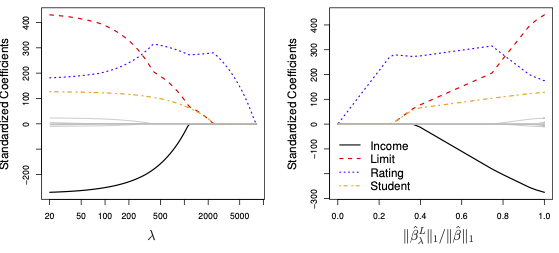

In [2]:
Image('ridge_coefs.png', width=800)

The right-hand panel of Figure displays the same ridge coefficient estimates as the left-hand panel, but instead of displaying $\lambda$ on the x-axis, we now display, $\boldsymbol {\big\| \mathbf {\hat \beta_{\lambda}^{R} \big\|}}_{2} \boldsymbol{\le \big\| \mathbf {\hat \beta } \big \|}_{2}$. Where $\boldsymbol{\mathbf {\hat \beta }}$ denotes the OLS coefficient estimates, and $\boldsymbol{\mathbf {\hat \beta }^{R}}$ is the ridge estimates. 

- The notation $\boldsymbol{\big\| \mathbf {\hat \beta } \big \|}_{2}$ denotes the _$l_{2} norm$_ , and is defined as 

    $$\boldsymbol{\big\| \mathbf {\hat \beta } \big \|}_{2}= \sqrt{\sum_{j=1}^{p} \beta_{j}^{2}}$$
    
-  The _$l_{2} norm$_ measures the distance of $\boldsymbol \beta$ from zero.


- The _$l_{2} norm$_ always decrease, and so does the $\boldsymbol {\big\| \mathbf {\hat \beta_{\lambda}^{R} \big\|}}_{2} \boldsymbol{\le \big\| \mathbf {\hat \beta } \big \|}_{2}$.


- The quantity $\boldsymbol {\big\| \mathbf {\hat \beta_{\lambda}^{R} \big\|}}_{2} \boldsymbol{\le \big\| \mathbf {\hat \beta } \big \|}_{2}$ range from **one** when $\boldsymbol \lambda = 0$ (the case of OLS), to **zero** when $\boldsymbol \lambda= \infty$ (the case of ridge regression where all the coefficient estimates are a vector of zeros, thus the _$l_{2} norm$_ will be equal to zero). 


- The amount of the _$l_{2} norm$_ measures the quantity of ridge coefficients skrinkage towards zero.


- A small amount of the _$l_{2} norm$_ indicates that the ridge coefficients have been shrunken very close zero. 


- A large amount of the _$l_{2} norm$_ indicates that the ridge coefficients have not been shrunken towards zero. 

## Standardization 

- As opposed to OLS estimates, which they don't depend on the scale of predictor variables, a ridge coefficient estimate depends on the scale of the predictor and the scale of other predictors. Thus, **standardazition** is an essential step in the ridge regression.


- In ridge regression standardize the independent variables by subtracting their means and dividing by their standard deviations. 


- All of the standardized predictors will have a standard deviation of one, which makes the ridge regression estimates don't depend on the measurement scale of predictors. 


- All ridge regression calculations are based on standardized variables. When the final regression coefficients are displayed, they are adjusted back into their original scale. However, the ridge trace is on a standardized scale.

$$\tilde x_{ij}=\frac{x_{ij}}{\sqrt { \frac{1}{n} \sum_{i=1}^{n} \big( x_{ij} - \bar x_{j} \big)^2}}$$

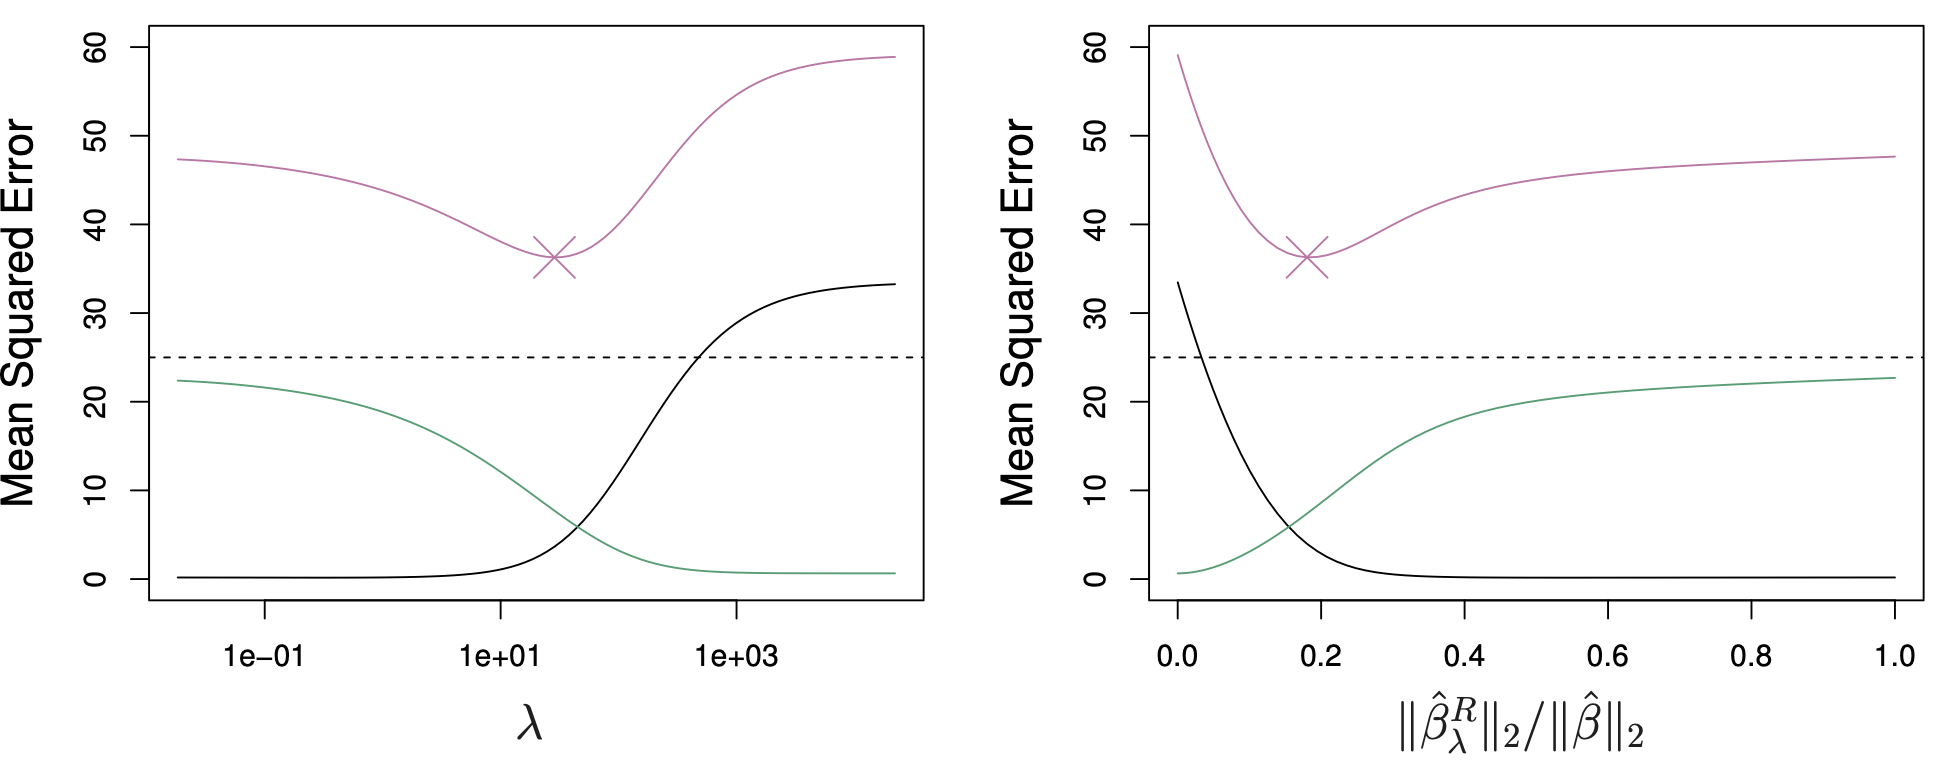

In [3]:
Image('BiasVariance_Ridge.png')

   - **Black**: Squared bias
   - **Green**: variance 
   - **Purple**: test mean squared error for the ridge regression predictions on a simulated data set, as a function of $\lambda$ and $\boldsymbol {\big\| \mathbf {\hat \beta_{\lambda}^{R} \big\|}}_{2} \boldsymbol{\le \big\| \mathbf {\hat \beta } \big \|}_{2}$ . 
   - **Horizontal dashed lines**: the minimum possible MSE. 
   - **Purple crosses**: the ridge regression models for which the MSE is smallest.

### Ridge Regression or Least Square Estimator Using Bias-Variance Trade-Off 

Recall: 

  1. **Bias**: Refers to the form of the model whether it represents the real world problem. models with low bias tend to __underfit__. 
  
  2. **Variance**: refers to the flexibility of the statistical model. __a small change in the data will lead to a huge change in the model parameters__. Models with high variance tend to __overfit__.

Ridge regression has an advantage over least squares in terms of bias-variance trade-off. 

- When $\lambda = 0$ (The LS case): The variance is __high but no bias__.

- When $\lambda = \infty$ (The Ridge case): The bias is __high but no variance__.


- When $\lambda$ increases, the ridge coefficients shrink, which lead to a decrease in variance but a an increase in bias.


- The increase of $\boldsymbol \lambda$ means decreasing the flexibility of the model, and as a result of flexibitily decrease, the variance decreases but bias increases. 


- the MSE is the sum of the tw quantities (bias and variance), so the best MSE is when both quantities are low.


- Finding the best $\lambda$ that lowers both bias and variance, where the MSE is at lowest point, is the point we are after. We call this process **hyper parameter tuning**.


- As for the plot of _$l_{2} norm$_ of ridge divided by _$l_{2} norm$_ of LS, the left side means ridge regression, where high bias but low variance. On the contrary, the right side means least square regression, the bias is high but the variance is low. The optimal point where both variance and bias are low, which results in low test MSE.

## Tuning the Ridge Regression Hyper Parameter

**What is tuning or hyper parameter tuning**?

- Trying a whole bunch of different values, fit all of them separately, then see how well each value performs, and choose the best one that neither underfits not overfits. This is process is called **Hyper paramater tuning**.


- In our case, ridge regression, we perform hyper parameter tuning to choose the best $\lambda$. 


- Hyper parameter tuning is recommended to be performed with **Cross Validation**.

### GridSeachCV

- Performing grid seach in sk-learn is done by usubg `GridSeachCV` from `model_selection`. 

- **GridSeachCV**: has several options:
    - **estimator**: the specified estimator (or algoritm) object (such as ridge, linear regression, KNN, Logistice regression, GBM ...) 
    - **param_grid**: the specified hyper paramters to tune as a dictionary, where:
        - The **keys** is the name of the hyper parameter such as $\alpha$ in ridge regression.
        - The **values** in the grid dictionary are lists containing the range of values of the relevant hyperparameter(s)  we wish to tune.
    - **cv**: the number of folds for cross validation.
 
**Syntax**: 

```python
est_obje.get_params()

# Example of ridge regression
r = Ridge()
r.get_params()
```

**Syntax**:
```python
## Import the GridSearchCV
from sklearn.model_selection import GridSearchCV

## Instantiate the estimator object
r_reg = Ridge()

## Instantiate GridSearchCV object

cv_ridge = GridSearchCV(r_reg,
                        param_grid = {"alpha": [val1, val2, ...]},
                        cv = 10)
```

## RandomizedSearchCV 

- Random Search in python is similar to grid search in several key steps. To perform **random search** with sklearn, you import `RandomizedSearchCV` from `sklearn.model_selection`. 

### Randomized Search options

- **estimator**: the specified estimator (or algorithm) object (in our case: ridge object)
    - **param_distributions**: the specified hyper paramters as a dictionary, where:
        - The **keys** is the name of the hyper parameter such as $\alpha$ in ridge regression.
        - The **values** in the grid dictionary are lists containing the range of values of the relevant hyperparameter(s)  we wish to tune.
    - **cv**: the number of folds for cross validation.
    - **score**: the scoring metric (function) on which the model performs best.
    - **n_iter**: the number of samples to take. how many combinations to select and train models with.
    
**Syntax**:

```python
# Import the RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Instantiate the RandomizedSearchCV object: tree_cv
rs_cv = RandomizedSearchCV(<estimator>,
                             param_dist,
                             cv = 5)

# Define how many samples to take
n_inter = n

# Fit the the object to the data
rs_cv.fit(X, y)

# Print the tuned parameters and score
print("The tuned Parameter(s): {}".format(rs_cv.best_params_))
print("Best score is {}".format(rs_cv.best_score_))
```